# 지가 데이터 분석

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 맥에서 글씨 깨짐 방지
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('../data/added_features/지가현황.xlsx')

In [3]:
df

,구분,'07.01,Unnamed: 2,'07.02,Unnamed: 4,'07.03,Unnamed: 6,'07.04,Unnamed: 8,'07.05,...,'24.01,Unnamed: 410,'24.02,Unnamed: 412,'24.03,Unnamed: 414,'24.04,Unnamed: 416,'24.05,Unnamed: 418
0,NaN,지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,...,지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비),지가지수,변동률(전월대비)
1,주거,62.906,0.52,63.208,0.48,63.462,0.4,63.676,0.34,63.886,...,100.151,0.15,100.306,0.16,100.521,0.21,100.753,0.23,100.99,0.24


In [4]:
drop_col = [f'Unnamed: {i}' for i in range(2, 420, 2)]
drop_col

['Unnamed: 2',
 'Unnamed: 4',
 'Unnamed: 6',
 'Unnamed: 8',
 'Unnamed: 10',
 'Unnamed: 12',
 'Unnamed: 14',
 'Unnamed: 16',
 'Unnamed: 18',
 'Unnamed: 20',
 'Unnamed: 22',
 'Unnamed: 24',
 'Unnamed: 26',
 'Unnamed: 28',
 'Unnamed: 30',
 'Unnamed: 32',
 'Unnamed: 34',
 'Unnamed: 36',
 'Unnamed: 38',
 'Unnamed: 40',
 'Unnamed: 42',
 'Unnamed: 44',
 'Unnamed: 46',
 'Unnamed: 48',
 'Unnamed: 50',
 'Unnamed: 52',
 'Unnamed: 54',
 'Unnamed: 56',
 'Unnamed: 58',
 'Unnamed: 60',
 'Unnamed: 62',
 'Unnamed: 64',
 'Unnamed: 66',
 'Unnamed: 68',
 'Unnamed: 70',
 'Unnamed: 72',
 'Unnamed: 74',
 'Unnamed: 76',
 'Unnamed: 78',
 'Unnamed: 80',
 'Unnamed: 82',
 'Unnamed: 84',
 'Unnamed: 86',
 'Unnamed: 88',
 'Unnamed: 90',
 'Unnamed: 92',
 'Unnamed: 94',
 'Unnamed: 96',
 'Unnamed: 98',
 'Unnamed: 100',
 'Unnamed: 102',
 'Unnamed: 104',
 'Unnamed: 106',
 'Unnamed: 108',
 'Unnamed: 110',
 'Unnamed: 112',
 'Unnamed: 114',
 'Unnamed: 116',
 'Unnamed: 118',
 'Unnamed: 120',
 'Unnamed: 122',
 'Unnamed: 124',

In [5]:
df.drop(drop_col, axis=1, inplace=True)
df

,구분,'07.01,'07.02,'07.03,'07.04,'07.05,'07.06,'07.07,'07.08,'07.09,...,'23.08,'23.09,'23.10,'23.11,'23.12,'24.01,'24.02,'24.03,'24.04,'24.05
0,NaN,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,...,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수
1,주거,62.906,63.208,63.462,63.676,63.886,64.124,64.365,64.654,64.972,...,99.133,99.324,99.577,99.805,100,100.151,100.306,100.521,100.753,100.99


In [7]:
df.drop(['구분'], axis=1, inplace=True)
df

,'07.01,'07.02,'07.03,'07.04,'07.05,'07.06,'07.07,'07.08,'07.09,'07.10,...,'23.08,'23.09,'23.10,'23.11,'23.12,'24.01,'24.02,'24.03,'24.04,'24.05
0,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,...,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수
1,62.906,63.208,63.462,63.676,63.886,64.124,64.365,64.654,64.972,65.341,...,99.133,99.324,99.577,99.805,100,100.151,100.306,100.521,100.753,100.99


In [14]:
cols = df.columns
cols

Index([''07.01', ''07.02', ''07.03', ''07.04', ''07.05', ''07.06', ''07.07',
       ''07.08', ''07.09', ''07.10',
       ...
       ''23.08', ''23.09', ''23.10', ''23.11', ''23.12', ''24.01', ''24.02',
       ''24.03', ''24.04', ''24.05'],
      dtype='object', length=209)

In [15]:
cols = [col.replace('\'', '') for col in cols]
cols = [int('20'+col.replace('.', '')) for col in cols]
cols

[200701,
 200702,
 200703,
 200704,
 200705,
 200706,
 200707,
 200708,
 200709,
 200710,
 200711,
 200712,
 200801,
 200802,
 200803,
 200804,
 200805,
 200806,
 200807,
 200808,
 200809,
 200810,
 200811,
 200812,
 200901,
 200902,
 200903,
 200904,
 200905,
 200906,
 200907,
 200908,
 200909,
 200910,
 200911,
 200912,
 201001,
 201002,
 201003,
 201004,
 201005,
 201006,
 201007,
 201008,
 201009,
 201010,
 201011,
 201012,
 201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112,
 201201,
 201202,
 201203,
 201204,
 201205,
 201206,
 201207,
 201208,
 201209,
 201210,
 201211,
 201212,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201401,
 201402,
 201403,
 201404,
 201405,
 201406,
 201407,
 201408,
 201409,
 201410,
 201411,
 201412,
 201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 

In [16]:
df.columns = cols
df

,200701,200702,200703,200704,200705,200706,200707,200708,200709,200710,...,202308,202309,202310,202311,202312,202401,202402,202403,202404,202405
0,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,...,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수,지가지수
1,62.906,63.208,63.462,63.676,63.886,64.124,64.365,64.654,64.972,65.341,...,99.133,99.324,99.577,99.805,100,100.151,100.306,100.521,100.753,100.99


In [19]:
land_valud_df = pd.DataFrame(df.iloc[1])
land_valud_df.columns = ['지가지수']
land_valud_df

,지가지수
200701,62.906
200702,63.208
200703,63.462
200704,63.676
200705,63.886
...,...
202401,100.151
202402,100.306
202403,100.521
202404,100.753


In [28]:
land_valud_df.reset_index(inplace=True)
land_valud_df.columns = ['년월', '지가지수']
land_valud_df

,년월,지가지수
0,200701,62.906
1,200702,63.208
2,200703,63.462
3,200704,63.676
4,200705,63.886
...,...,...
204,202401,100.151
205,202402,100.306
206,202403,100.521
207,202404,100.753


# 시각화

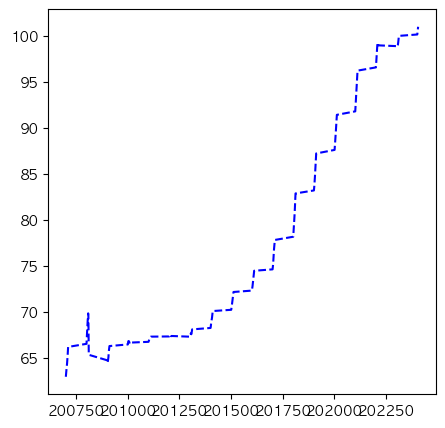

In [37]:
plt.figure(figsize=(5, 5))
plt.plot(land_valud_df['년월'], land_valud_df['지가지수'], linestyle='--', color='b')
plt.show()

# 원본에 적용

In [20]:
df = pd.read_csv('../data/preprocessed/6_expected_inflation.csv')

/var/folders/zt/1l6rrzf977nbpmcz1d2j0vd40000gn/T/ipykernel_35366/2913683505.py:1: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/preprocessed/6_expected_inflation.csv')


In [21]:
df.head()

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,가장 가까운 버스 정류소명,가장 가까운 버스 정류소 타입,가장 가까운 버스 정류장 X좌표,가장 가까운 버스 정류장 Y좌표,인근 버스 정류장 개수,계약년,계약월,GDP,한국은행 기준금리,기대 인플레이션
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,개포우성아파트,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,개포우성아파트,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4,1.5,2.6
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,개포우성아파트,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4,1.5,2.6


In [29]:
land_value_mapping = pd.Series({ym: price for ym, price in zip(land_valud_df['년월'], land_valud_df['지가지수'])})

df['지가지수'] = np.nan
df['지가지수'] = df['지가지수'].fillna(df['계약년월'].map(land_value_mapping))

In [30]:
df

,시군구,번지,본번,부번,아파트명,전용면적,계약년월,계약일,층,건축년도,...,가장 가까운 버스 정류소 타입,가장 가까운 버스 정류장 X좌표,가장 가까운 버스 정류장 Y좌표,인근 버스 정류장 개수,계약년,계약월,GDP,한국은행 기준금리,기대 인플레이션,지가지수
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,...,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,...,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,54.98,201712,28,5,1987,...,일반차로,127.057864,37.476564,7.0,2017,12,1623074.1,1.5,2.5,77.794
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,3,4,1987,...,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4,1.5,2.6,78.143
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201801,8,2,1987,...,일반차로,127.057864,37.476564,7.0,2018,1,1725373.4,1.5,2.6,78.143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128089,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.65,202307,19,13,2014,...,일반차로,127.107073,37.619326,7.0,2023,7,1712792.9,3.5,3.3,98.993
1128090,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.62,202307,25,12,2014,...,일반차로,127.107073,37.619326,7.0,2023,7,1712792.9,3.5,3.3,98.993
1128091,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,101.65,202308,27,12,2014,...,일반차로,127.107073,37.619326,7.0,2023,8,1712792.9,3.5,3.3,99.133
1128092,서울특별시 중랑구 신내동,816,816.0,0.0,신내우디안1단지,84.94,202309,2,18,2014,...,일반차로,127.107073,37.619326,7.0,2023,9,1712792.9,3.5,3.3,99.324


In [31]:
df.to_csv('../data/preprocessed/7_land_value.csv', index=False)